# Data Science Milestone 1 Phase 2

by: Muhammad Farhan Zahirsyah

Batch 10

---
### Desctription
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services in California in Q3. It indicates which customers have left, stayed, or signed up for their service. 


### Objective
- Predicting behavior to retain customer using neural networks model

### Problem Statement
- How to predict behavior to retain costumer using neural networks model


---
### Dataset Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## I. Import Library

importing all library

In [1]:
# essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn
import pickle
import keras_tuner as kt

# scikit-learn library model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# scikit-learn library model selection & preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# scikit-learn library pipeline
from sklearn.compose import ColumnTransformer

# tensorflow library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout

# removing warnings in cell
import warnings
warnings.filterwarnings('ignore')

# capping outlier library winsorizer
from feature_engine.outliers import Winsorizer, OutlierTrimmer

printing version so the future reading for this notebook can adjust the library version for this notebook to work

In [172]:
print('Pandas Version     :',pd.__version__)
print('Numpy Version      :',np.__version__)
print('Matplotlib Version :',matplotlib.__version__)
print('Seaborn Version    :',sns.__version__)
print('Sklearn Version    :',sklearn.__version__)
print('Tensorflow Version :',tf.__version__)

Pandas Version     : 1.4.2
Numpy Version      : 1.22.3
Matplotlib Version : 3.5.2
Seaborn Version    : 0.11.2
Sklearn Version    : 1.0.2
Tensorflow Version : 2.9.0


## II. Data Loading

collecting dataset from local path

In [3]:
df_ori = pd.read_csv('data/costumer_churn.csv',)

In [4]:
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


preview of 5 top index data

In [5]:
df_ori.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


preview of all columns including the row

In [6]:
df_ori.shape

(7043, 21)

there ara 7043 rows and 21 columns

In [7]:
df_ori.select_dtypes(include=np.number).describe().style.background_gradient(cmap='RdBu_r')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


the senior citizen are binary variable

In [8]:
df_ori['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [9]:
df_ori.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


there are 18 object types columns

In [10]:
df_ori.select_dtypes(include=['object']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [11]:
for i in df_ori.select_dtypes(include=['object']):
    print(i)
    print(df_ori[i].unique())
    print("-"*50)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender
['Female' 'Male']
--------------------------------------------------
Partner
['Yes' 'No']
--------------------------------------------------
Dependents
['No' 'Yes']
--------------------------------------------------
PhoneService
['No' 'Yes']
--------------------------------------------------
MultipleLines
['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup
['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection
['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport
['No' 'Yes' 'No internet service']
------------

above are what are the categorical values inside the object datatypes features

total charges are object datatypes, these needs to be converted into numerical

In [12]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


there are no missing value

In [13]:
df_ori.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## III. Exploratory Data Analysis

In [14]:
print(df_ori['Churn'].value_counts())
print('-'*50)
print('percentage yes/no: \n',(df_ori['Churn'].value_counts()/len(df_ori))*100)
print('-'*50)
print('percentage null: \n',(df_ori['Churn'].isnull().sum()/len(df_ori))*100)

No     5174
Yes    1869
Name: Churn, dtype: int64
--------------------------------------------------
percentage yes/no: 
 No     73.463013
Yes    26.536987
Name: Churn, dtype: float64
--------------------------------------------------
percentage null: 
 0.0


after we saw that the datase is mildly imbalanced for the target label. 73% are no and 26% are yes

we need to visualize how these two category compared

<AxesSubplot:xlabel='Churn', ylabel='count'>

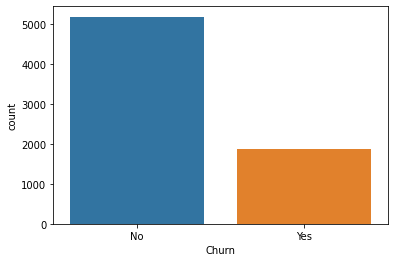

In [15]:
sns.countplot(x='Churn',data=df_ori)

the plot above visualizing that the target label are mildly imbalanced

total charges datatypes is object, therefore we need to change it into float before splitting into data inference

In [16]:
df=df_ori.copy()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

sampling 10 data for data inference

In [17]:
data_inf = df.sample(10,random_state=1)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3381,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
6180,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
4829,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No
3737,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
4249,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No
6835,7964-ZRKKG,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.30,No
3869,1357-BIJKI,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.70,No
3943,8720-RQSBJ,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,No
3491,4682-BLBUC,Male,0,Yes,No,44,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,No
6847,8930-XOTDP,Female,0,Yes,Yes,18,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.80,No


reset index for data inference and data

In [18]:
data = df.drop(data_inf.index)
data.reset_index(drop=True,inplace=True)
data_inf.reset_index(drop=True,inplace=True)

preview of data inference

In [19]:
data_inf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No


scatterplot numerical datatypes using pairplot

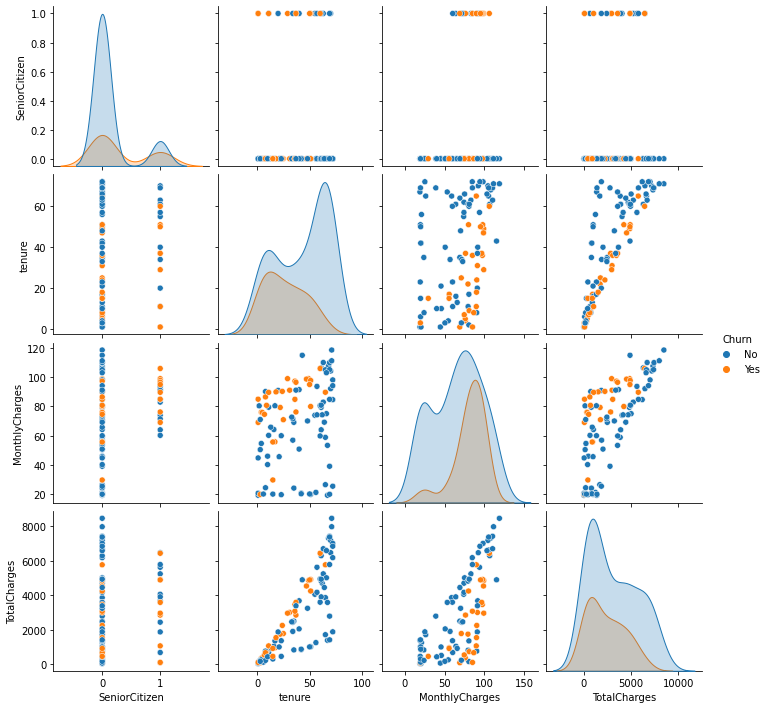

In [20]:
sns.pairplot(data.sample(100),hue='Churn')

as you can see senior citizen contains binary value, and theres corelation between totalcharges with tenure and totalcharges with monthlycharges

and then plotting the distribution for numerical datatypes

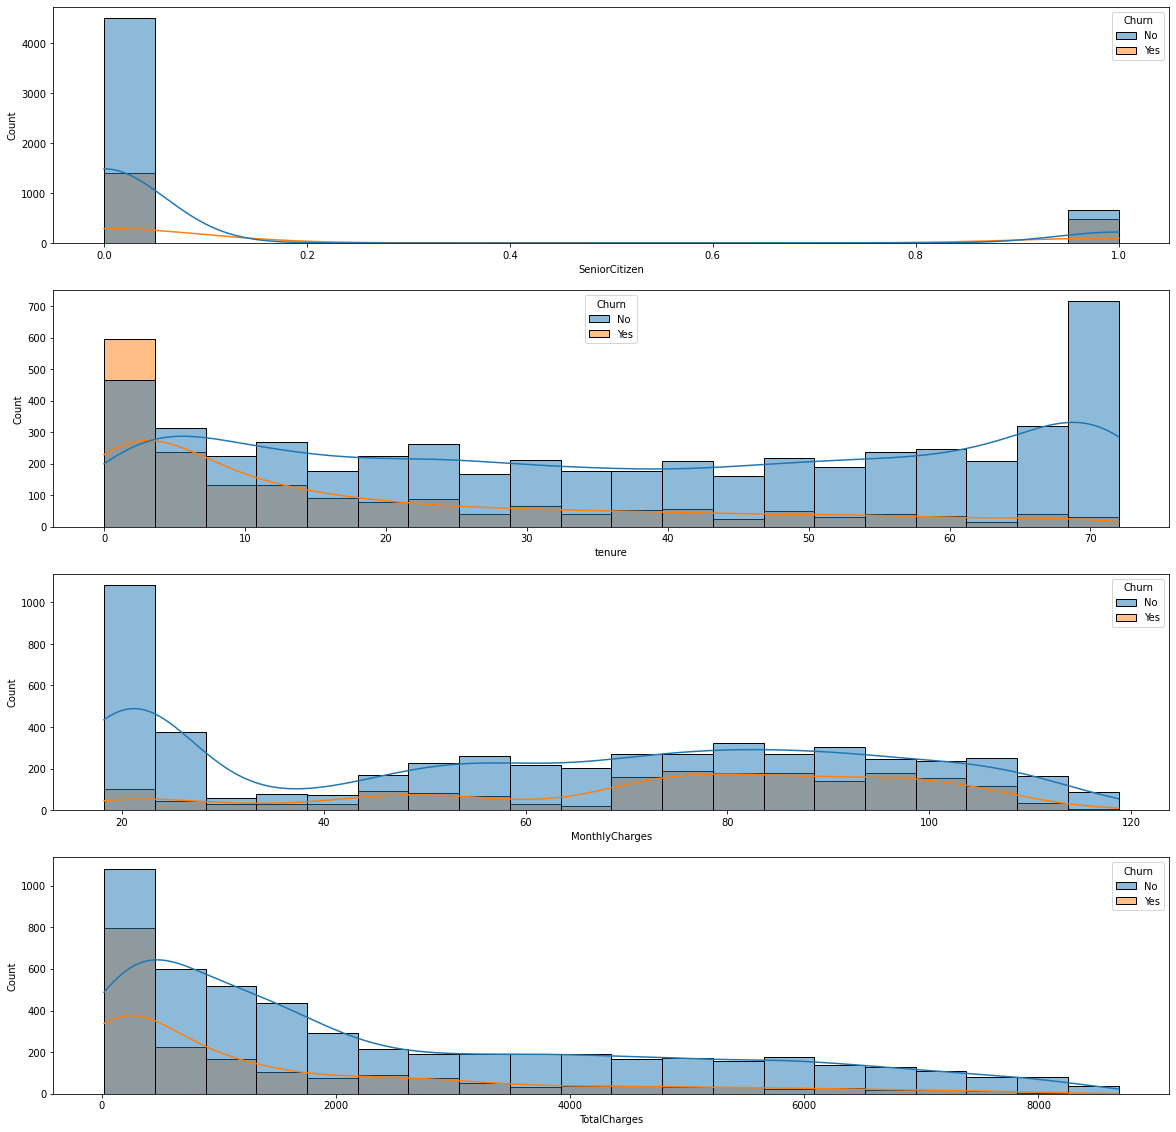

In [21]:
j=0
fig, ax = plt.subplots(4,1,figsize=(20,20))
for i in data.select_dtypes(include=np.number):
    sns.histplot(x=i,data=data,hue='Churn',ax=ax[j],kde=True, bins=20)
    j+=1
plt.show(fig)


moslty from visualization the distribusion are skewed and distributed well without too many outliers

now we are going to visualize the category feature in these dataset

<AxesSubplot:xlabel='Dependents', ylabel='count'>

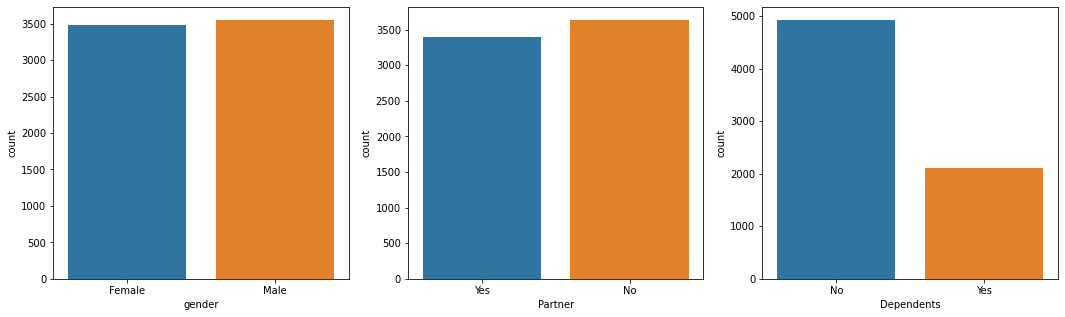

In [22]:
fig,ax = plt.subplots(1,3,figsize=(18,5))
sns.countplot(x='gender',data=data,ax=ax[0])
sns.countplot(x='Partner',data=data,ax=ax[1])
sns.countplot(x='Dependents',data=data,ax=ax[2])

distribution between female and male are equally plenty, theres more non dependents user than yes

<AxesSubplot:xlabel='InternetService', ylabel='count'>

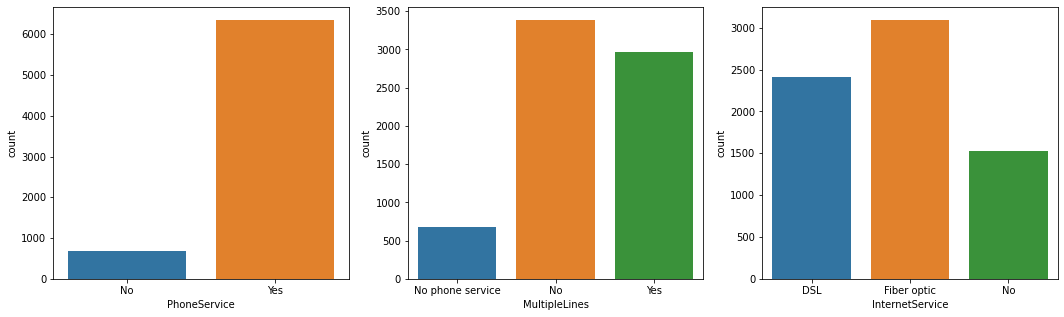

In [23]:
fig,ax = plt.subplots(1,3,figsize=(18,5))
sns.countplot(x='PhoneService',data=data,ax=ax[0])
sns.countplot(x='MultipleLines',data=data,ax=ax[1])
sns.countplot(x='InternetService',data=data,ax=ax[2])

most of the costumer having phone service and almost 3000 customer have multiplelines, and fiber optics internet services are the most user in this dataset

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

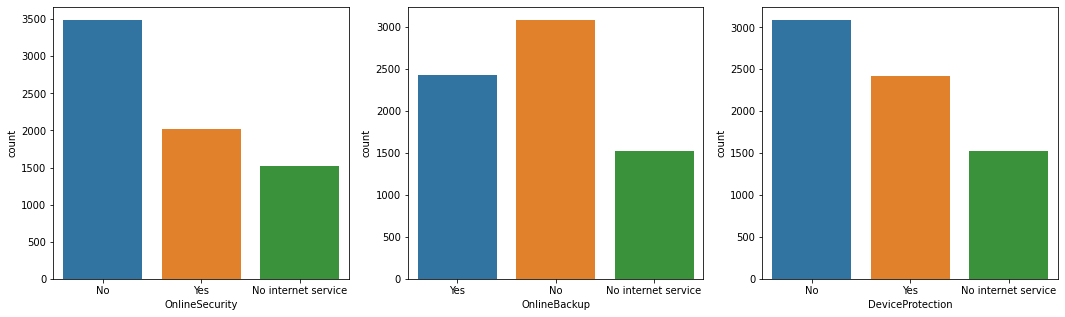

In [24]:
fig,ax = plt.subplots(1,3,figsize=(18,5))
sns.countplot(x='OnlineSecurity',data=data,ax=ax[0])
sns.countplot(x='OnlineBackup',data=data,ax=ax[1])
sns.countplot(x='DeviceProtection',data=data,ax=ax[2])

not many costumer have online security and online backup. and most costumer doesnt have device protection also

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

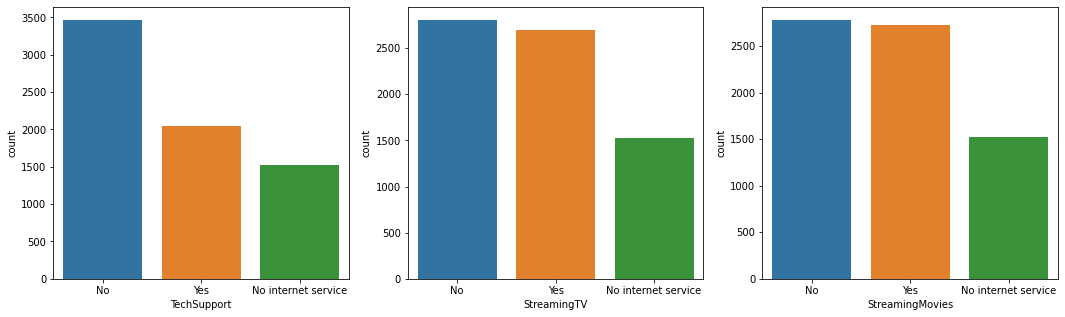

In [25]:
fig,ax = plt.subplots(1,3,figsize=(18,5))
sns.countplot(x='TechSupport',data=data,ax=ax[0])
sns.countplot(x='StreamingTV',data=data,ax=ax[1])
sns.countplot(x='StreamingMovies',data=data,ax=ax[2])

most of the costumer doesnt have tech support access, but its divided that the costumer having streaming tv or streaming movies between yes and no

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

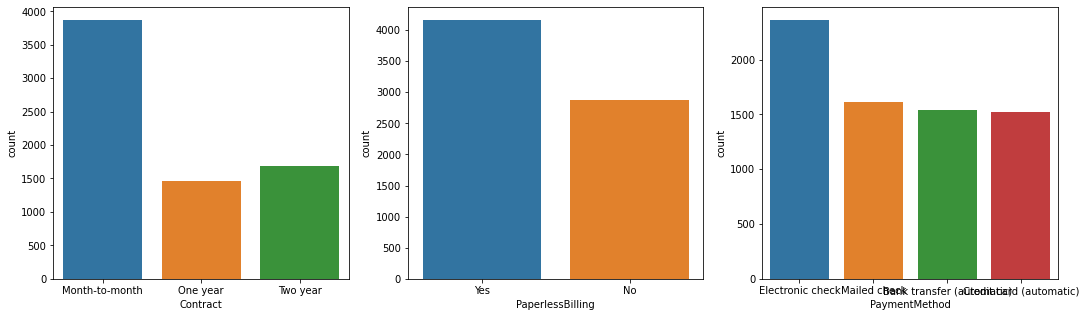

In [26]:
fig,ax = plt.subplots(1,3,figsize=(18,5))
sns.countplot(x='Contract',data=data,ax=ax[0])
sns.countplot(x='PaperlessBilling',data=data,ax=ax[1])
sns.countplot(x='PaymentMethod',data=data,ax=ax[2])

many of the costumer paid mont-to-month, and mostly are preffered paperless billing with electronic payment

## IV. Data Preprocessing

### A. Split data

splitting data train, test  and validation. data validation is splitted from first split of data training

In [27]:
x = data.drop(['Churn'],axis=1)
y = data['Churn']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1,stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.1,random_state=1,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(6329, 20)
(1407, 20)
(704, 20)


because the dataset are mildly imbalanced i use stratify=y. the dataset are divided to 80% train and 20% test, and then the 80% divided again for validation data 10% from the 80%.

these num columns are from datatypes numerical

In [28]:
num_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']
num_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

these categorical columns are from datatype object

In [29]:
cat_columns = ['customerID',
                'gender',
                'Partner',
                'Dependents',
                'PhoneService',
                'MultipleLines',
                'InternetService',
                'OnlineSecurity',
                'OnlineBackup',
                'DeviceProtection',
                'TechSupport',
                'StreamingTV',
                'StreamingMovies',
                'Contract',
                'PaperlessBilling',
                'PaymentMethod']
cat_columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

## V. Outlier Handling

In carrying out outlier handling, there are several stages that researchers do to get clean data. the summary of the data cleaning stages is as follows:

- create a treatment table, this is used to find out the distribution, lcl, ucl and treatments that can be done to the train data for outlier handling.
- perform outlier handling on normal data and must be capped by means of a winorizer
- perform outlier handling on data that must be trimmed with outlier trimmer

for more details, it will be done the same as the steps above


### A. Outliers Function

In [30]:
# membuat fungsi untuk data yang skew dan dilakukan pencarian batas bawah dan batas atas menggunakan IQR
def iqr(data,column):
    lower_limit= data[column].quantile(0.25) - 3*(data[column].quantile(0.75)-data[column].quantile(0.25))
    upper_limit= data[column].quantile(0.75) + 3*(data[column].quantile(0.75)-data[column].quantile(0.25))
    return lower_limit, upper_limit

# membuat fungsi untuk data yang berdistribusi normal untuk mencari batas atas dan batas bawah menggunakan standard deviasi.
def lcl_ucl_std(data,column):
    lcl = data[column].mean() - 1.5*data[column].std()
    ucl = data[column].mean() + 1.5*data[column].std()
    return lcl,ucl

# membuat fungsi untuk mengetahui berapa banyak persentase outliers untuk masing-masing distribusi yang skewed dan normal. 
# bila tidak terdapat outliers dari kolom tersebut maka nilainya akan menjadi 0
def perc_outliers_iqr(data,column):
    lcl,ucl = iqr(data,column)
    try:
        result = data[column][(data[column]<=lcl) | (data[column]>=ucl)].count()/len(data[column])
    except:
        result = 0
    return result

def perc_outliers_std(data,column):
    lcl,ucl = lcl_ucl_std(data,column)
    try:
        result = data[column][(data[column]<=lcl) | (data[column]>=ucl)].count()/len(data[column])
    except:
        result = 0
    return result
    
# membuat fungsi untuk menyatukan fungsi IQR dan std deviasi. dengan pemilihan fungsi dilihat dari skewness data. 
# apabila diatas -0.5 dan dibawah 0.5 maka data tersebut berdistribusi normal. 
# sedangkan diluar dari nilai tersebut maka data berdistribusi skew
def outliers(data,column,distr):
    if distr <= -0.5 or distr >= 0.5:
        lcl,ucl = iqr(data,column)
        percentage = perc_outliers_iqr(data,column)
    elif distr > -0.5 or distr < 0.5:
        lcl,ucl = lcl_ucl_std(data,column)
        percentage = perc_outliers_std(data,column)
    return lcl,ucl,percentage

>if a data point is below Q1 − 1.5×IQR or above Q3 + 1.5×IQR, it is viewed as being too far from the central values to be reasonable. and if If your assignment is having you consider not only outliers but also "extreme values", then the values for Q1 − 1.5×IQR and Q3 + 1.5×IQR are the "inner" fences and the values for Q1 − 3×IQR and Q3 + 3×IQR are the "outer" fences.[1]

in order that not a lot of data is out of the iqr range, then I take 3xIQR which also includes extreme values.

### B. Creating Treatment Table

To make it easier which column is skewed or normal and what treatment should be done, I created a treatment table whose contents are numeric columns with the following description:

|Nama Kolom | Deskripsi |
|---|---|
|name| numeric column name|
| distr| distribuation name|
|percentage| precentage of outliers|
|skewness| value of skew distribution |
|treatment| treatment that needs to be done|

In [31]:
# menambah data kolom skew pada kolom numerik x_train
skew = []
for i in x_train[num_columns]:
    skew.append(x_train[i].skew())
# menambah data kolom percentage dengan menggunakan fungsi outliers
percentage = []
j = 0
for i in x_train[num_columns]:
    percentage.append(outliers(x_train,i,skew[j])[2])
    j += 1

# menambah kolom treatment untuk mengetahui treatment apa yg harus dilakukan terhadap feature
treatment = []
j=0
for i in x_train[num_columns]:
    if percentage[j] == 0:
        treatment.append('No outliers')
    elif percentage[j] <= 0.05:
        treatment.append('trim')
    elif percentage[j] <= 0.15:
        treatment.append('capping')
    elif percentage[j] > 0.15:
        treatment.append('do not treat')
    j += 1

# menambah kolom distribution dengan melihat nilai skewed. 
# bila didalam nilai -0.5 sampai 0.5 maka berdistribusi normal. diluar nilai tersebut maka berdistribusi skewed
distribution = []
j = 0
for i in x_train[num_columns]:
    if skew[j] >= -0.5 and skew[j] <= 0.5:
        distribution.append('normal')
    else: 
        distribution.append('skewed')
    j += 1

# membuat dataframe dengan variabel outlier_treatment untuk menjadi rangka tabel treatment
outlier_treatment = pd.DataFrame()
outlier_treatment['name'] = x_train[num_columns].columns
outlier_treatment['distr'] = distribution
outlier_treatment['percentage'] = percentage
outlier_treatment['skewness'] = skew
outlier_treatment['treatment'] = treatment

in the percentage column whose value is 0 it is obtained from the outliers function. it has been explained in the markdown of the oultiers function that 0 is no outliers.

the value of percentage outliers below 0.05 or 5% of the data column means that we can discard the data.

the value of percentage outliers above 5% to 15% of the data column means that we can do capping on the data.

the value of percentage outliers above 15% of the data column means we have to leave the data. because it could be that this is not an anomaly outliers.

In [32]:
outlier_treatment

,name,distr,percentage,skewness,treatment
0,SeniorCitizen,skewed,1.000000,1.848318,do not treat
1,tenure,normal,0.103650,0.248787,capping
2,MonthlyCharges,normal,0.066519,-0.214034,capping
3,TotalCharges,skewed,0.000000,0.967478,No outliers


seen above is a summary of the numerical column that will be treated with outliers.

### C. Executing Outliers

using the winsorizer function, enter a column that is normally distributed and must be treated with capping

In [33]:
capping_norm = outlier_treatment[(outlier_treatment['treatment'] == 'capping') & (outlier_treatment['distr'] == 'normal')]
capping_norm

,name,distr,percentage,skewness,treatment
1,tenure,normal,0.103650,0.248787,capping
2,MonthlyCharges,normal,0.066519,-0.214034,capping


query for normally distributed numeric columns and must be capping

In [34]:
column_cap_norm = capping_norm['name'].unique().tolist()

takes a normally distributed name and must be capping

In [35]:
windsoriser = Winsorizer(capping_method='gaussian', # choose gaussian for mean and std
                          tail='both', # cap both tails 
                          fold=1.5,
                          variables=column_cap_norm,
                            missing_values='ignore')

windsoriser.fit(x_train)
x_train_cap_norm = windsoriser.transform(x_train)

data has finised outlier handling

### D. Outliers Handling Summary

In [36]:
x_train_outlier_clean = x_train_cap_norm.copy()
print('Before Outlier handling:', x_train.shape)
print('After Outlier handling:', x_train_outlier_clean.shape)
print(f'Ratio Outlier Handing : {x_train_outlier_clean.shape[0]/x_train.shape[0]:.2%}')

Before Outlier handling: (6329, 20)
After Outlier handling: (6329, 20)
Ratio Outlier Handing : 100.00%


summary before outlier handling there were 6329 rows and 20 columns and after outlier handling it was the same into 6329 rows and 20 columns. with the percentage of data that is still maintained as much as 100%

## V. Data Cleaning

cleaning data categorical that needs to be simplified 

In [37]:
for i in x_train_outlier_clean.select_dtypes(include=['object']):
    print(i)
    print(x_train_outlier_clean[i].unique())
    print("-"*50)

customerID
['6377-KSLXC' '2276-YDAVZ' '8885-QSQBX' ... '2604-IJPDU' '4692-NNQRU'
 '1518-VOWAV']
--------------------------------------------------
gender
['Male' 'Female']
--------------------------------------------------
Partner
['No' 'Yes']
--------------------------------------------------
Dependents
['No' 'Yes']
--------------------------------------------------
PhoneService
['Yes' 'No']
--------------------------------------------------
MultipleLines
['No' 'Yes' 'No phone service']
--------------------------------------------------
InternetService
['No' 'Fiber optic' 'DSL']
--------------------------------------------------
OnlineSecurity
['No internet service' 'No' 'Yes']
--------------------------------------------------
OnlineBackup
['No internet service' 'No' 'Yes']
--------------------------------------------------
DeviceProtection
['No internet service' 'No' 'Yes']
--------------------------------------------------
TechSupport
['No internet service' 'No' 'Yes']
------------

no internet services or no phone services will be categorized as No

In [38]:
x_train_outlier_clean['customerID'].describe()

count           6329
unique          6329
top       6377-KSLXC
freq               1
Name: customerID, dtype: object

replacing the category no phone service and no internet service as no

In [39]:
x_replace = x_train_outlier_clean.copy()
x_replaced = x_replace.replace({'MultipleLines':{'No phone service':'No'},
                    'InternetService':{'No internet service':'No'},
                    'OnlineSecurity':{'No internet service':'No'},
                    'OnlineBackup':{'No internet service':'No'},
                    'DeviceProtection':{'No internet service':'No'},
                    'TechSupport':{'No internet service':'No'},
                    'StreamingTV':{'No internet service':'No'},
                    'StreamingMovies':{'No internet service':'No'}})

preview after replaced

In [40]:
x_replaced.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3021,6377-KSLXC,Male,0,No,No,5.0,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.95,107.05
693,2276-YDAVZ,Female,0,No,No,3.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.70
3755,8885-QSQBX,Female,0,No,No,1.0,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),49.55,49.55
5985,0687-ZVTHB,Male,0,Yes,Yes,65.0,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Credit card (automatic),72.45,4653.85
3227,7669-LCRSD,Male,0,Yes,Yes,12.0,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,56.30,628.65


because costumer ID has high cardinality therefore we drop it

In [41]:
x_drop = x_replaced.drop('customerID',axis=1)

these are the summary describe after cleaning

In [42]:
x_drop.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
gender,6329,2,Male,3181
Partner,6329,2,No,3267
Dependents,6329,2,No,4441
PhoneService,6329,2,Yes,5705
MultipleLines,6329,2,No,3666
InternetService,6329,3,Fiber optic,2769
OnlineSecurity,6329,2,No,4511
OnlineBackup,6329,2,No,4131
DeviceProtection,6329,2,No,4135
TechSupport,6329,2,No,4496


now after we saw the description of the categorical data, we want to seperate them for one hot encoding and ordinal encoding

In [43]:
cat_col_ord = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies',  'PaperlessBilling','SeniorCitizen']
cat_col_ohe = [ 'InternetService','Contract','PaymentMethod',]

In [44]:
x_drop.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

there are 11 missing value in total charges, because the distribution is skewed the strategy is median

In [45]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
totalcharge = imputer.fit_transform(x_drop['TotalCharges'].values.reshape(-1,1))

x_drop['TotalCharges'] = totalcharge

data has been cleaned

In [46]:
x_train_clean = x_drop.copy()
print('After data cleaning                            :',x_train_clean.shape)
print('Before data cleaning                           :',x_train.shape)
print(f'Ratio all outliers and missing value trimming : {x_train_clean.shape[0]/x_train.shape[0]:.2%}')

After data cleaning                            : (6329, 19)
Before data cleaning                           : (6329, 20)
Ratio all outliers and missing value trimming : 100.00%


summary before data cleaning there were 6329 rows and 20 columns and after data cleaning it was the same into 6329 rows and 19 columns. with the percentage of data that is still maintained as much as 100%

## V. Feature Selecting

in order for us to select a feature we need to encode and scaling the data accordingly, therefore there will be separation between features that will be treat accordingly.

one hot encoding is used for nominal categorical features such as internetservice, contract, paymentmethod

In [47]:
ohe = OneHotEncoder(sparse=False)

x_train_ohe = x_train_clean.copy()
internetservice = ohe.fit_transform(x_train_ohe[cat_col_ohe[0]].values.reshape(-1,1))
internetservice = pd.DataFrame(internetservice,columns=x_train_ohe[cat_col_ohe[0]].unique())
contract = ohe.fit_transform(x_train_ohe[cat_col_ohe[1]].values.reshape(-1,1))
contract = pd.DataFrame(contract,columns=x_train_ohe[cat_col_ohe[1]].unique())
paymentmethod = ohe.fit_transform(x_train_ohe[cat_col_ohe[2]].values.reshape(-1,1))
paymentmethod = pd.DataFrame(paymentmethod,columns=x_train_ohe[cat_col_ohe[2]].unique())

x_train_ohe = pd.concat([internetservice,contract,paymentmethod],axis=1)

ordinal encoder is used for categorical ordinal, which all of the features are binary categorical

In [48]:
ord_encoder = OrdinalEncoder()
x_train_ord = ord_encoder.fit_transform(x_train_clean[cat_col_ord])
x_train_ord = pd.DataFrame(x_train_ord,columns=[cat_col_ord])

separating numerical columns that normal distribution and skewed distribution

In [49]:
num_col_norm = [ 'tenure', 'MonthlyCharges']
num_col_skew = [ 'TotalCharges']

standard scaler is used for feature normaly distributed and minmax scaler is used for skewed distribution features

In [50]:
standard_scale = StandardScaler()
x_scale_norm = standard_scale.fit_transform(x_train_clean[num_col_norm])
x_scale_norm = pd.DataFrame(x_scale_norm,columns=num_col_norm)

minmax_scale = MinMaxScaler()
x_scale_skew = minmax_scale.fit_transform(x_train_clean[num_col_skew])
x_scale_skew = pd.DataFrame(x_scale_skew,columns=num_col_skew)

### A. Feature Correlation

label encoder for encoding the target label churn and then plot the heatmap correlation

<AxesSubplot:>

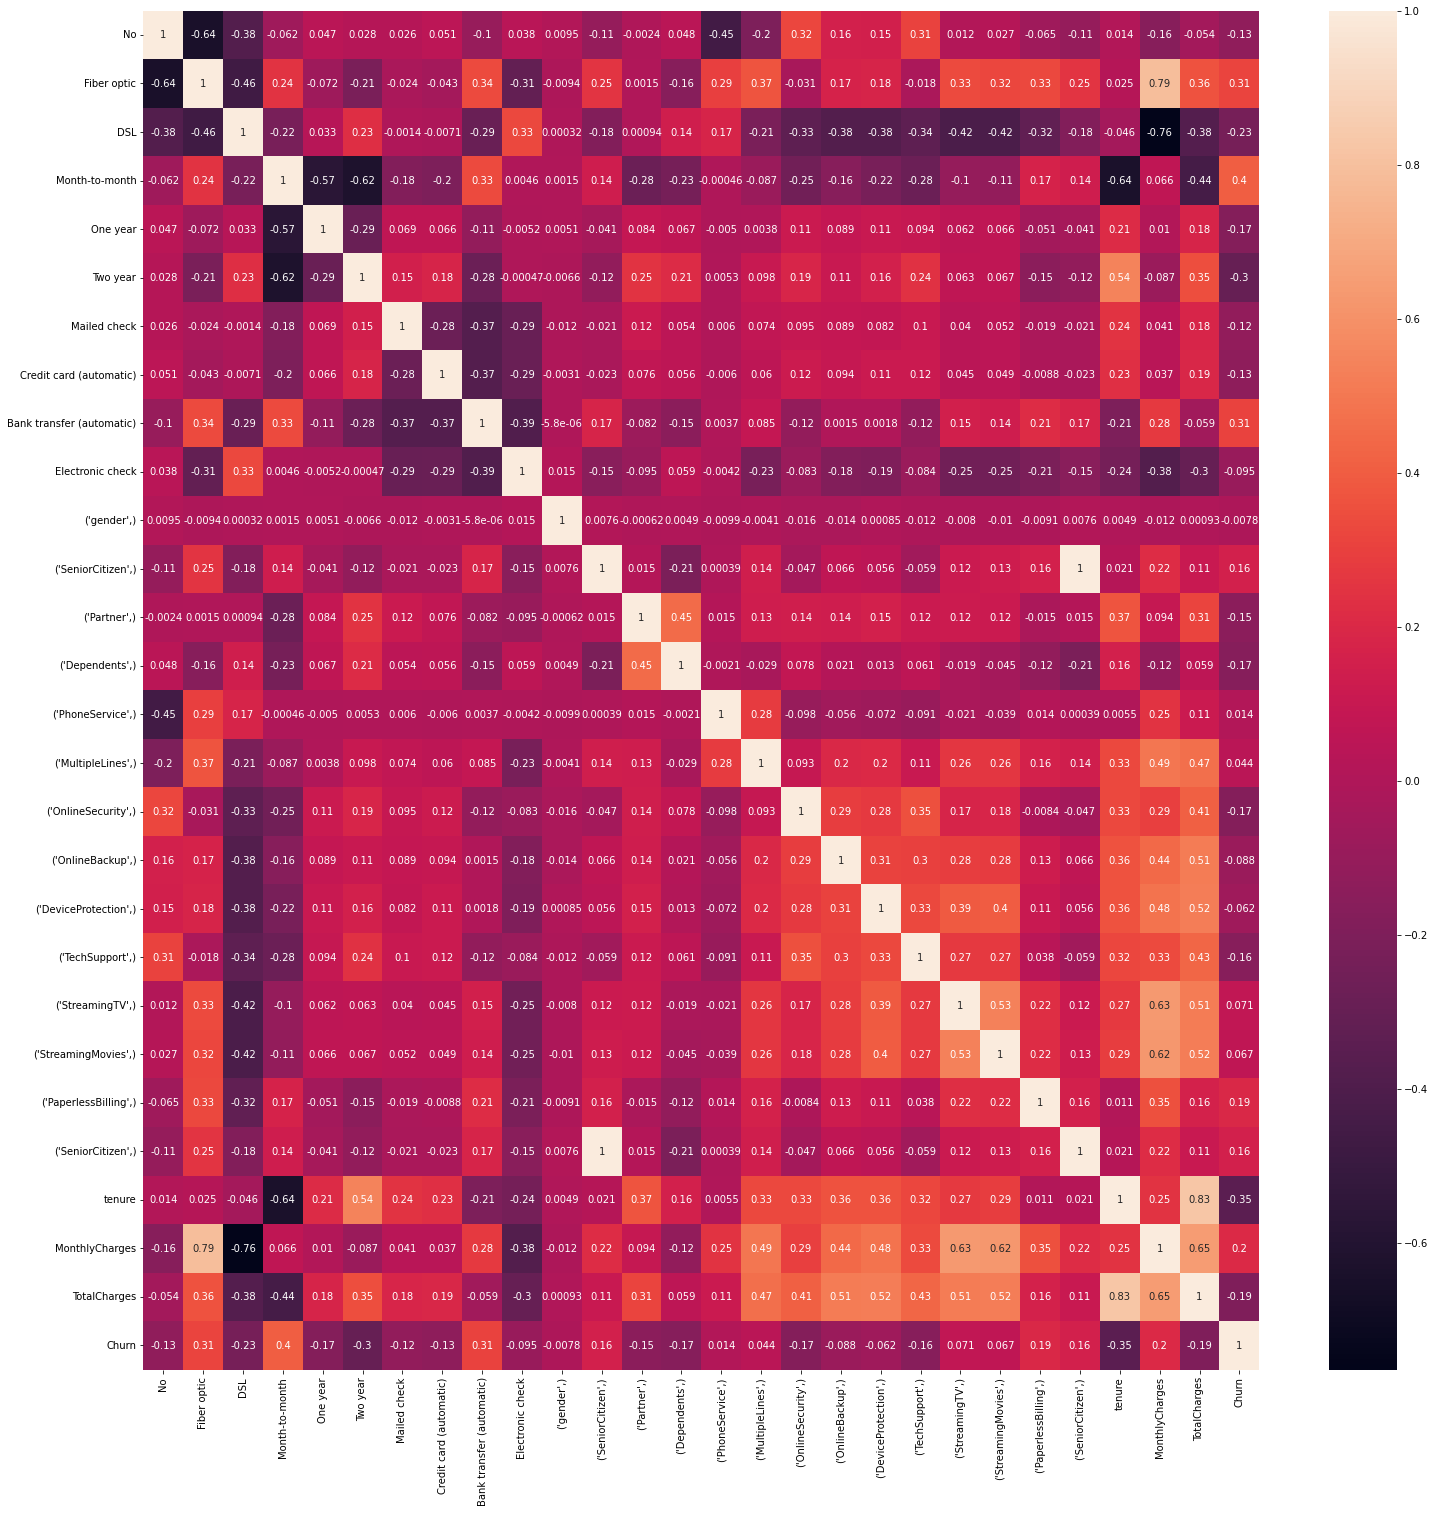

In [51]:
label_encoder = LabelEncoder()
y_encoded = y_train.copy()
y_encoded = label_encoder.fit_transform(y_encoded)
y_encoded = pd.Series(y_encoded,name='Churn')

x_scale_encode = pd.concat([x_train_ohe,x_train_ord,x_scale_norm,x_scale_skew, y_encoded], axis=1)
plt.figure(figsize=(25,25))
sns.heatmap(x_scale_encode.corr(), annot=True)

below are plot correlation between features and target label churn

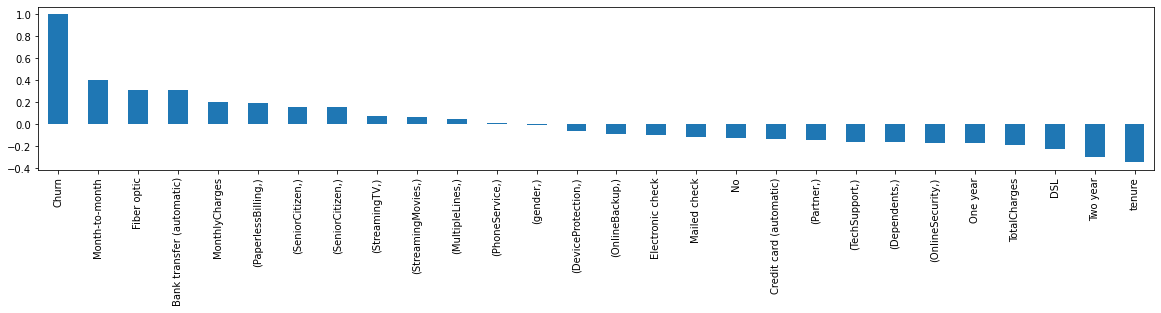

In [52]:
plt.figure(figsize=(20,3))
x_scale_encode.corr()['Churn'].sort_values(ascending=False).plot.bar()
plt.show()

going to select features that are mostly correlated to churn. if theyre needed.

In [53]:
col_select = ['Month-to-Month','Fiber optic','Bank transfer (automatic)','tenure','Two year']

dropping churn from the previous variable that going inside heatmap correlation

In [54]:
x_clean = x_scale_encode.drop('Churn',axis=1)

### B. Feature Importance

in order for knowing which feature is important or not, im going to use feature importance using random forest classifier

In [55]:
index = x_clean.columns.tolist()

random_forest = RandomForestClassifier()
# fit the random_forest
random_forest.fit(x_clean, y_encoded)
# get importance
importance = random_forest.feature_importances_
# summarize feature importance
df_importance = pd.DataFrame()
for i,v in enumerate(importance):
	df_importance = df_importance.append(pd.Series([v,index[i]]),ignore_index=True)
df_importance.sort_values(0,ascending=False,inplace=True)

these are feature importance each feature sorted by importance value high to low

In [56]:
df_importance

,0,1
26,0.185753,TotalCharges
25,0.168144,MonthlyCharges
24,0.150166,tenure
3,0.069958,Month-to-month
1,0.037482,Fiber optic
8,0.033652,Bank transfer (automatic)
10,0.027672,"(gender,)"
22,0.026430,"(PaperlessBilling,)"
12,0.023008,"(Partner,)"
16,0.022764,"(OnlineSecurity,)"


because the model is going to be artificial neural network, the features will be inputed all and if theres low importance level in the features, the weight connecting neurons will be reduced accordingly.

therefore theres no selection or reducing the features in this cases

## VI. Model Definition

printing each columns with their data category types

In [57]:
print(num_col_norm)
print(num_col_skew)
print(cat_col_ohe)
print(cat_col_ord)

['tenure', 'MonthlyCharges']
['TotalCharges']
['InternetService', 'Contract', 'PaymentMethod']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'SeniorCitizen']


### prepping x validation and x test

In [58]:
x_val_drop = x_val.drop(['customerID'],axis=1)
x_test_drop = x_test.drop(['customerID'],axis=1)

drop costumer id and replacing x test adn x validation categorical 

In [59]:
x_val_final = x_val_drop.replace({'MultipleLines':{'No phone service':'No'},
                      'InternetService':{'No internet service':'No'},
                    'OnlineSecurity':{'No internet service':'No'},
                    'OnlineBackup':{'No internet service':'No'},
                    'DeviceProtection':{'No internet service':'No'},
                    'TechSupport':{'No internet service':'No'},
                    'StreamingTV':{'No internet service':'No'},
                    'StreamingMovies':{'No internet service':'No'}})

x_test_final = x_test_drop.replace({'MultipleLines':{'No phone service':'No'},
                    'InternetService':{'No internet service':'No'},
                    'OnlineSecurity':{'No internet service':'No'},
                    'OnlineBackup':{'No internet service':'No'},
                    'DeviceProtection':{'No internet service':'No'},
                    'TechSupport':{'No internet service':'No'},
                    'StreamingTV':{'No internet service':'No'},
                    'StreamingMovies':{'No internet service':'No'}})

making preprocess using sklearn column transformer

In [60]:
preprocess = ColumnTransformer(
    transformers=[
        ('num_col_norm', StandardScaler(), num_col_norm),
        ('num_col_skew', MinMaxScaler(), num_col_skew),
        ('cat_col_ohe', OneHotEncoder(), cat_col_ohe),
        ('cat_col_ord', OrdinalEncoder(), cat_col_ord)
            ])


x_train_preprocess = preprocess.fit_transform(x_train_clean)
x_test_preprocess = preprocess.transform(x_test_final)
x_val_preprocess = preprocess.transform(x_val_final)

y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

In [168]:
x_train_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3021,Male,0,No,No,5.0,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.95,107.05
693,Female,0,No,No,3.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.70
3755,Female,0,No,No,1.0,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),49.55,49.55
5985,Male,0,Yes,Yes,65.0,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Credit card (automatic),72.45,4653.85
3227,Male,0,Yes,Yes,12.0,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,56.30,628.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Male,0,Yes,Yes,29.0,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,20.65,654.85
6000,Male,0,No,Yes,39.0,No,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),54.85,2191.70
195,Female,0,Yes,No,20.0,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,96.55,1901.65
2905,Female,0,Yes,No,21.0,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,One year,No,Electronic check,79.20,1742.45


In [61]:

with open('models/preprocess_ann.pkl', 'wb') as f:
    pickle.dump(preprocess, f)

### Base Model Logistic Regression

in order to find the base model, im using the simplest model algorithm for binary classification which is logistic regression.

In [62]:
logreg = LogisticRegression()
logreg.fit(x_train_preprocess, y_encoded)
yval_predict = logreg.predict(x_val_preprocess)
ytrain_predict = logreg.predict(x_train_preprocess)
print(classification_report(y_val_enc,yval_predict))
print(classification_report(y_encoded,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       517
           1       0.62      0.55      0.58       187

    accuracy                           0.79       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.78      0.79      0.79       704

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4648
           1       0.66      0.55      0.60      1681

    accuracy                           0.81      6329
   macro avg       0.76      0.73      0.74      6329
weighted avg       0.80      0.81      0.80      6329



doing prediction to x validation data, the result are f1 score No equals to 0.86 and f1 score yes equals to 0.58 with accuracy score 0.79. this model is the base model for the given datasets.

model almost overfit with differentiation 0.02 in accuracy

### Neural Network Model Sequential API

checking if the GPU is available for ANN model training

In [63]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


making tensorflow pipeline using shuffle with buffer size 32 and batch 32. I also using tensorflow pipeline for test dataset using same batch value 32

In [64]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_preprocess, y_encoded))
train_dataset = train_dataset.shuffle(buffer_size=32).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test_preprocess, y_test_enc))
test_dataset = test_dataset.batch(32)

using sequential API making 2 hidden layers with 13 and 6 neurons inside the hidden layers. with activation exponential linear unit.

and then compile it using adam optimizer and loss using binary crossentropy cause the classification target label is binary

after that training the model with 50 epochs and save it in history variable

In [65]:
model = Sequential([
    Dense(16, activation='elu',input_shape=(27,)),
    Dropout(0.2),
    Dense(6, activation='elu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=50,validation_data=(x_val_preprocess, y_val_enc))

Epoch 1/50
198/198 [==============================] - 2s 5ms/step - loss: 0.5649 - accuracy: 0.7036 - val_loss: 0.4516 - val_accuracy: 0.7812
Epoch 2/50
198/198 [==============================] - 1s 5ms/step - loss: 0.4585 - accuracy: 0.7846 - val_loss: 0.4404 - val_accuracy: 0.7940
Epoch 3/50
198/198 [==============================] - 1s 4ms/step - loss: 0.4445 - accuracy: 0.7940 - val_loss: 0.4364 - val_accuracy: 0.7940
Epoch 4/50
198/198 [==============================] - 1s 4ms/step - loss: 0.4410 - accuracy: 0.7955 - val_loss: 0.4346 - val_accuracy: 0.7912
Epoch 5/50
198/198 [==============================] - 1s 5ms/step - loss: 0.4386 - accuracy: 0.7941 - val_loss: 0.4353 - val_accuracy: 0.7855
Epoch 6/50
198/198 [==============================] - 1s 5ms/step - loss: 0.4336 - accuracy: 0.7943 - val_loss: 0.4354 - val_accuracy: 0.7884
Epoch 7/50
198/198 [==============================] - 1s 5ms/step - loss: 0.4340 - accuracy: 0.7924 - val_loss: 0.4355 - val_accuracy: 0.7898
Epoch 

print summary evaluation

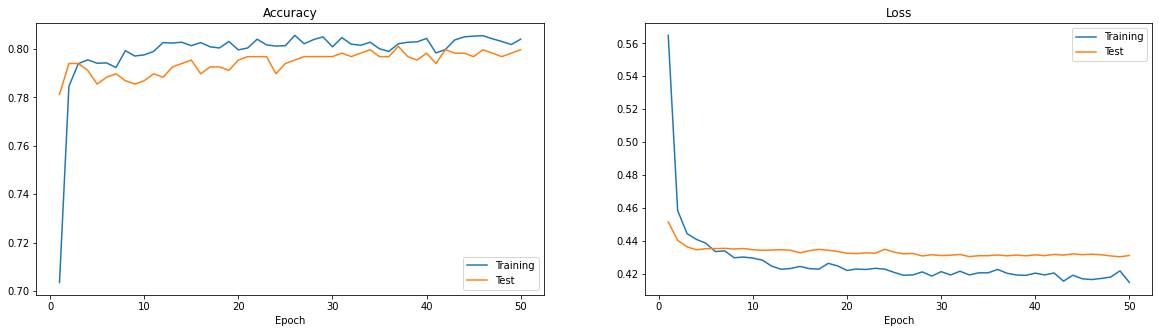

In [119]:
fig,ax=plt.subplots(ncols=2,figsize=(20,5))
epochs=len(history.history['accuracy'])
ax[0].plot(range(1,epochs+1),history.history['accuracy'],label='Training')
ax[0].plot(range(1,epochs+1),history.history['val_accuracy'],label='Test')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

ax[1].plot(range(1,epochs+1),history.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history.history['val_loss'],label='Test')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()
plt.show()

as we can see after epoch 10 the model struggling to improve more than that. instead the model stagnant from 0.79 to 0.81 accuracy score. lets see the classification report

In [67]:
yval_ann_predict = model.predict(x_val_preprocess)
yval_ann_predict = np.where(yval_ann_predict>0.5,1,0)
ytrain_ann_predict = model.predict(x_train_preprocess)
ytrain_ann_predict = np.where(ytrain_ann_predict>0.5,1,0)
print(classification_report(y_val_enc,yval_ann_predict))
print(classification_report(y_encoded,ytrain_ann_predict))

198/198 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       517
           1       0.63      0.59      0.61       187

    accuracy                           0.80       704
   macro avg       0.74      0.73      0.74       704
weighted avg       0.80      0.80      0.80       704

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4648
           1       0.66      0.58      0.61      1681

    accuracy                           0.81      6329
   macro avg       0.76      0.73      0.74      6329
weighted avg       0.80      0.81      0.80      6329



the model improve in validation test better 0.01 accuracy rather than logistic reggresion. the model is not overfit but cannot improve more than that.

In [165]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                448       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


in the summary of sequential API input layers are included in first dense layer containing 448 parameter, drop out is used because the model tend to overfit because all features are included in this model. so wee need to drop out or disconnect neurons from light weight features, this makes model not overfit to train data. the  second layer contains 6 neurons with 102 parameters. 

saving model into ann_model.h5

In [68]:
model.save('models/ann_model.h5')

### Neural Network Model Functional API

With the Functional API, where you start from Input, you chain layer calls to specify the model's forward pass, and finally you create your model from inputs and outputs

I'm using the same architecture number of layers and neurons like sequential API, even optimizer are equally using adam

In [69]:
data_in = Input(shape=(27,))
data_drop = Dropout(0.25)(data_in)
hidden_1 = Dense(16, activation='elu')(data_drop)
hidden1_drop = Dropout(0.25)(hidden_1)
hidden_2 = Dense(6, activation='elu')(hidden1_drop)
hidden2_drop = Dropout(0.25)(hidden_2)
out = Dense(1, activation='sigmoid')(hidden2_drop)

model_func = Model(inputs=data_in, outputs=out)

model_func.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_func = model_func.fit(train_dataset,epochs=50,validation_data=(x_val_preprocess, y_val_enc))

Epoch 1/50
198/198 [==============================] - 2s 6ms/step - loss: 0.5681 - accuracy: 0.7011 - val_loss: 0.4518 - val_accuracy: 0.7727
Epoch 2/50
198/198 [==============================] - 1s 5ms/step - loss: 0.4836 - accuracy: 0.7677 - val_loss: 0.4430 - val_accuracy: 0.7770
Epoch 3/50
198/198 [==============================] - 1s 5ms/step - loss: 0.4721 - accuracy: 0.7671 - val_loss: 0.4427 - val_accuracy: 0.7869
Epoch 4/50
198/198 [==============================] - 1s 5ms/step - loss: 0.4589 - accuracy: 0.7816 - val_loss: 0.4393 - val_accuracy: 0.7855
Epoch 5/50
198/198 [==============================] - 1s 6ms/step - loss: 0.4564 - accuracy: 0.7737 - val_loss: 0.4372 - val_accuracy: 0.7898
Epoch 6/50
198/198 [==============================] - 1s 5ms/step - loss: 0.4551 - accuracy: 0.7809 - val_loss: 0.4353 - val_accuracy: 0.7884
Epoch 7/50
198/198 [==============================] - 1s 6ms/step - loss: 0.4584 - accuracy: 0.7772 - val_loss: 0.4357 - val_accuracy: 0.7898
Epoch 

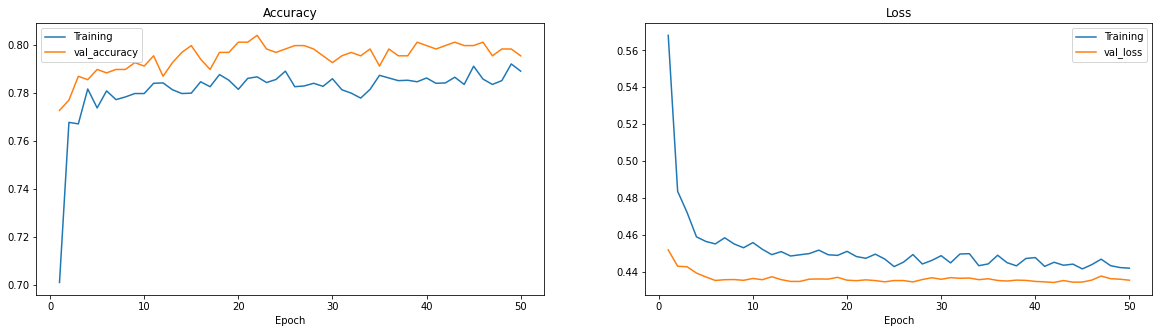

In [118]:
fig,ax=plt.subplots(ncols=2,figsize=(20,5))
epochs=len(history_func.history['accuracy'])
ax[0].plot(range(1,epochs+1),history_func.history['accuracy'],label='Training')
ax[0].plot(range(1,epochs+1),history_func.history['val_accuracy'],label='val_accuracy')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

ax[1].plot(range(1,epochs+1),history_func.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history_func.history['val_loss'],label='val_loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()
plt.show()

from visualisation even though the architecture are the same, the accuracy from validation and training are slightly different.

In [71]:
yval_ann_predict_func = model_func.predict(x_val_preprocess)
yval_ann_predict_func = np.where(yval_ann_predict_func>0.5,1,0)
ytrain_ann_predict_func = model_func.predict(x_train_preprocess)
ytrain_ann_predict_func = np.where(ytrain_ann_predict_func>0.5,1,0)
print(classification_report(y_val_enc,yval_ann_predict_func))
print(classification_report(y_encoded,ytrain_ann_predict_func))

198/198 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       517
           1       0.63      0.56      0.59       187

    accuracy                           0.80       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.79      0.80      0.79       704

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4648
           1       0.66      0.54      0.59      1681

    accuracy                           0.80      6329
   macro avg       0.75      0.72      0.73      6329
weighted avg       0.79      0.80      0.80      6329



both accuracy are equally 80. improvement from base logistic model, but from sequential model there are decrease in accuracy.

saving model into ann_model_func.h5

In [166]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 27)]              0         
                                                                 
 dropout_2 (Dropout)         (None, 27)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                448       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 6)                 102       
                                                                 
 dropout_4 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7     

total parameter in functional API are 557 parameter from layer dense 3 and from layer dense 4 and layer dense output 7. these architecture slightly different from sequential API because theres input layer and then theres dropout layer after it. and then its similar to sequential architecture. but all parameter are equally 557 parameter

In [72]:
model_func.save('models/ann_model_func.h5')

## IIX. Model Improvement

### Hyperparameter Tuning with Keras tuner

model improvement using Keras tuner. the concept are similar to hyperparameter tuning grid search. the difference is with keras tuner we can tune hyperparameter each layers and different learning rate of optimizer.

Im changing number of neurons in first layer from 2 to 26 layes with 2 step each tuning

Im changing number of neurons in second layer form 2 to 26 layers with 2 step each tuning

im using dropout because from previous neural network architecture the models tend to overfit.

In [73]:
def model_builder(hp):
  #using sequential API
  model = keras.Sequential()

  # define a hyperparameter for tuning
  hp_units = hp.Int('units', min_value=2, max_value=26, step=2)  
  
  # first layer
  model.add(keras.layers.Dense(units=hp_units,activation='elu',input_shape=(27,)))
  model.add(Dropout(0.2))

  # second layer
  model.add(keras.layers.Dense(units=hp_units,activation='elu'))
  model.add(Dropout(0.2))

  # output layer
  model.add(Dense(1, activation='sigmoid'))
  
  # define a hyperparameter for tuning learning rate
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  # compile the model
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

define the keras model using hyperband, and saving it into directory path for each epochs

In [74]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='keras_tuner_ann_2')

making callbacks for exit early

In [75]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuning search hyperparameter

In [76]:
tuner.search(train_dataset, epochs=50, validation_data=(x_val_preprocess, y_val_enc), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. 

The optimal number of units in the first densely-connected layer is : {best_hps.get('units')} 

and the optimal learning rate for the optimizer is  : {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 10s]
val_accuracy: 0.7883522510528564

Best val_accuracy So Far: 0.8039772510528564
Total elapsed time: 00h 04m 36s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. 

The optimal number of units in the first densely-connected layer is : 20 

and the optimal learning rate for the optimizer is  : 0.01.



The optimal number of units in the first densely-connected layer is 20 and the optimal learning rate for the optimizer is  0.01. using this keras tuner.


Build the model with the optimal hyperparameters and train it on the data for 50 epochs, these train are for searching best epoch from the best hyperparameter

In [77]:
model_tuner = tuner.hypermodel.build(best_hps)
history_tuner = model_tuner.fit(train_dataset, epochs=50, validation_data=(x_val_preprocess, y_val_enc),verbose=0)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 37


after we found out that the best epoch is 37 then we are going into train the model with best hyperparameter and best epoch

In [78]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(train_dataset, epochs=best_epoch, validation_data=(x_val_preprocess, y_val_enc))

Epoch 1/37
198/198 [==============================] - 2s 6ms/step - loss: 0.4458 - accuracy: 0.7891 - val_loss: 0.4384 - val_accuracy: 0.8040
Epoch 2/37
198/198 [==============================] - 1s 6ms/step - loss: 0.4310 - accuracy: 0.7932 - val_loss: 0.4337 - val_accuracy: 0.7983
Epoch 3/37
198/198 [==============================] - 1s 5ms/step - loss: 0.4275 - accuracy: 0.7978 - val_loss: 0.4340 - val_accuracy: 0.7926
Epoch 4/37
198/198 [==============================] - 1s 5ms/step - loss: 0.4277 - accuracy: 0.7984 - val_loss: 0.4325 - val_accuracy: 0.7884
Epoch 5/37
198/198 [==============================] - 1s 5ms/step - loss: 0.4246 - accuracy: 0.7990 - val_loss: 0.4321 - val_accuracy: 0.7912
Epoch 6/37
198/198 [==============================] - 1s 5ms/step - loss: 0.4235 - accuracy: 0.8027 - val_loss: 0.4331 - val_accuracy: 0.7940
Epoch 7/37
198/198 [==============================] - 1s 5ms/step - loss: 0.4252 - accuracy: 0.7984 - val_loss: 0.4344 - val_accuracy: 0.7997
Epoch 

evaluation from the best hyperparameter and best epochs

In [79]:
eval_result = hypermodel.evaluate(train_dataset)
print("[test loss, test accuracy]:", eval_result)

198/198 [==============================] - 1s 3ms/step - loss: 0.4044 - accuracy: 0.8106
[test loss, test accuracy]: [0.4043731093406677, 0.810554563999176]


saving the hypertuner model into ann_model_tuner_hypermodel_best.h5

the ann_model_tuner_hypermodel_else.h5 used for not overwriting the best hypermodel

In [117]:
hypermodel.save('models/ann_model_tuner_hypermodel_else.h5')

classification report from validation and train prediction

In [88]:
yval_ann_predict_tuner = hypermodel.predict(x_val_preprocess)
ytrain_ann_predict_tuner = hypermodel.predict(x_train_preprocess)
yval_ann_predict_tuner = np.where(yval_ann_predict_tuner>0.5,1,0)
ytrain_ann_predict_tuner = np.where(ytrain_ann_predict_tuner>0.5,1,0)
print(classification_report(y_val_enc,yval_ann_predict_tuner))
print(classification_report(y_encoded,ytrain_ann_predict_tuner))

198/198 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       517
           1       0.73      0.49      0.59       187

    accuracy                           0.82       704
   macro avg       0.78      0.71      0.74       704
weighted avg       0.81      0.82      0.80       704

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4648
           1       0.72      0.48      0.57      1681

    accuracy                           0.81      6329
   macro avg       0.77      0.70      0.73      6329
weighted avg       0.80      0.81      0.80      6329



there is some improvement in validation  accuracy into 0.82 these are the best score so far

In [89]:
ytest_ann_predict_tuner = hypermodel.predict(x_test_preprocess)
ytest_ann_predict_tuner = np.where(ytest_ann_predict_tuner>0.5,1,0)
print(classification_report(y_test_enc,ytest_ann_predict_tuner))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1033
           1       0.74      0.47      0.57       374

    accuracy                           0.81      1407
   macro avg       0.78      0.70      0.73      1407
weighted avg       0.81      0.81      0.80      1407



when predicting into test data the result are in good condition which means that the model are improved from base model logistic 0.79 into 0.81-0.82

In [167]:
hypermodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                560       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


the summary are the first and second layer having 20 neurons and total parameter with this architecture is 1001.

## IX. Model Inference

model inference is made for testing the model with new data outside of the train and test split data. Data inference is simulated that there is new data to be predicted from the model that has been made.

show data inference

In [90]:
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No
5,7964-ZRKKG,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.30,No
6,1357-BIJKI,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.70,No
7,8720-RQSBJ,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,No
8,4682-BLBUC,Male,0,Yes,No,44,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,No
9,8930-XOTDP,Female,0,Yes,Yes,18,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.80,No


dropping unused feature costumer ID and targel label churn

In [91]:
data_inf_drop = data_inf.drop(['customerID','Churn'],axis=1)

transforming scaling and encoding using preprocess column transformer pipeline

In [92]:
data_inf_transform = preprocess.transform(data_inf_drop)

predicting data using hypermodel

In [170]:
y_inf = hypermodel.predict(data_inf_transform)
y_inf = np.where(y_inf>0.5,1,0)

1/1 [==============================] - 1s 708ms/step


result of the prediction

In [171]:
prediction = pd.DataFrame()
prediction['Actual'] = data_inf['Churn']
prediction['Predicted'] = y_inf
prediction

,Actual,Predicted
0,No,0
1,No,0
2,No,0
3,Yes,0
4,No,0
5,No,0
6,No,0
7,No,0
8,No,0
9,No,0


theres 1 wrong answer into the data inference

## X. Summary

the sequential and functional API are slightly much better than the base model of logistic regression around 0.79 to 0.8 of accuracy. both of them are using similar architecture of layers activation and optimizer, with 577 parameters are equally same. but the result are slightly different from each other. Dropout was used for making the model not overfitting into train data. because the feature that we used are all of it then some of the weights even from a weakest feature can have a weight. these from my analysis are causing the overfitting.

And then using hyperparameter tuning using Keras Tuner. The optimal number of units in the first densely-connected layer is 20 and the optimal learning rate for the optimizer is  0.01. the optimal epochs are 37 to make the best hypertuner model. 

the model are improved from base model logistic regression and the base model of sequential and functional API. from 0.79 into maximum 0.82 in validation data 

## XI. Referensi

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011., citation link https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html

Martín Abadi, et.al. TensorFlow: Large-scale machine learning on heterogeneous systems, 2015. Software available from tensorflow.org. citation link https://zenodo.org/record/6555127#.Yod0kehByM8

[1] Quartiles, Boxes, and Whiskers., purplemath.com, Retrived from https://www.purplemath.com/modules/boxwhisk.htm